<a href="https://colab.research.google.com/github/davidharket/FashionMNIST_Computer_Vision_Model/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

## Computer Vision libraries in PyTorch

* `torchvision` -base domain library for computer vision in pytorch
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.transorms` - functiosn for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
import torch

In [ ]:
# import PyTorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualizaton
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.0.1+cu118
0.15.2+cu118


## Getting a dataset

Will be using FashionMNIST

In [ ]:
from torchvision import datasets
import torch

train_data = datasets.FashionMNIST(
    root="data", # where to download dataset to
    train=True, # do we want to train on this data
    download=True, # do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)



In [ ]:
torch.manual_seed(42)
len(train_data), len(test_data)
torch.manual_seed(42)

In [ ]:
torch.manual_seed(42)
# see the first training example
image, label =train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
torch.manual_seed(42)
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
torch.manual_seed(42)
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
torch.manual_seed(42)
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
torch.manual_seed(42)
image.shape, class_to_idx

(torch.Size([1, 28, 28]),
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [ ]:
torch.manual_seed(42)
class_names[label]

'Ankle boot'

## Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

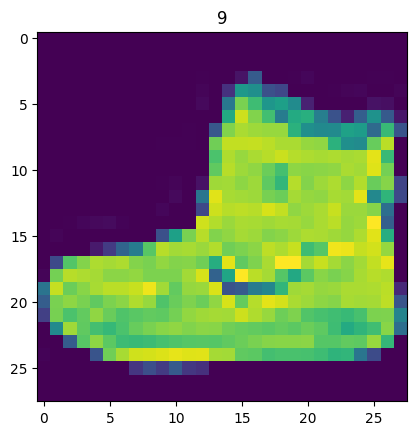

In [ ]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

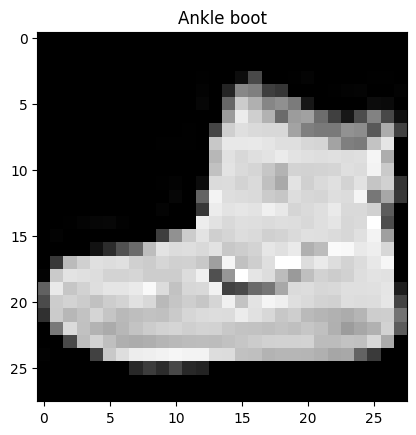

In [ ]:
torch.manual_seed(42)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

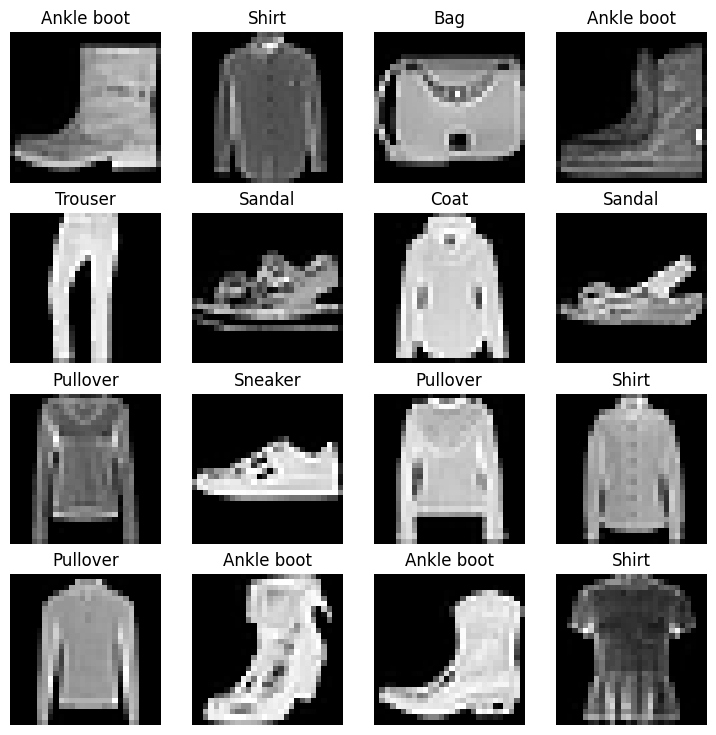

In [ ]:
# Plot more images
RANDOM_SEED = 42
torch.cuda.manual_seed(RANDOM_SEED)
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label  = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## Prepare DataLoader

Right now, data is in the form of PyTorch Dataset
DataLoader turns out dataset into a python iterable.
We want to turn out data into batche (or mini-batches).

Reasons:
1. More computationally efficient, as in, your computing harware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 3)
2. Gives our neural network more chances to updata its gradients per epoch.

In [ ]:
# Turn train dataset into dataLoader
from torch.utils.data import DataLoader

torch.manual_seed(42)

# Setup Batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True, )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

test_dataloader, train_dataloader2



(<torch.utils.data.dataloader.DataLoader at 0x78e6acbdc670>,
 <torch.utils.data.dataloader.DataLoader at 0x78e6acbdfc10>)

In [ ]:
# Initial check
torch.manual_seed(42)
print(f"DataLoaders{train_dataloader, test_dataloader}")
print(f"Length of train_loader:{len(train_dataloader)} batcheesof {BATCH_SIZE}...")
print(f"Length of train_loader:{len(test_dataloader)} batchesesof {BATCH_SIZE}...")


DataLoaders(<torch.utils.data.dataloader.DataLoader object at 0x78e6acbdfc10>, <torch.utils.data.dataloader.DataLoader object at 0x78e6acbdc670>)
Length of train_loader:1875 batcheesof 32...
Length of train_loader:313 batchesesof 32...


In [ ]:
# Check out what's inside the training dataloader
torch.manual_seed(42)

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


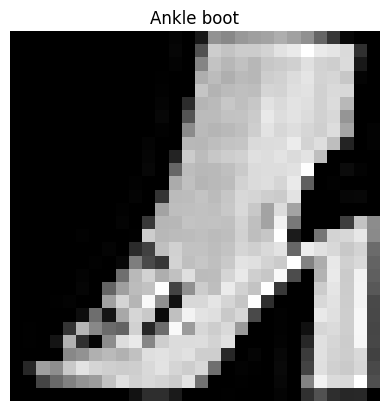

In [ ]:
# Show sample
torch.cuda.manual_seed(42)
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## Model 0: Build a baseline model

start simply and add complexity when necessary

In [ ]:
torch.manual_seed(42)

# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) #perform forwarrd pass

# Print out what happend
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn

torch.manual_seed(42)


class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(

        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape))
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
#setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape= 784, #this is 28x28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names)
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

### Setup loss, optimizer and evaluations metrics

* Loss Funciton - Working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer`torch.optim.SGD()` (Stochastic Gradient Descent)
* Evaluation metrics - Working on a classification problem, using accuracy as evaluation metric

In [ ]:
# calculate accuracy (classification metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #torch.eq() calculates where two tensors are equeal
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
import requests
from pathlib import Path

torch.manual_seed(42)

# Download PyTorch helper_functions.py (for simplicity)
if Path("helper_functions.py").is_file():
  print("helper_fucntions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_fucntions.py already exists, skipping download...


In [ ]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Function to time our experiments


In [ ]:
from pickleshare import stat

torch.manual_seed(42)

# Write function to time experiments
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# Example
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.528099998424295e-05

### Creating a training loop and training our model on batches of data
1. Loop through epochs.
2. Loop thorugh training batches, perform training steps, calculate the train loss *per batch*.
3. Loop thorugh testing batches, perform testing steps, calculate the test loss per batch.
4. Print summary

In [ ]:
#import progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs (keep it small for fater training time)
epochs = 1

# Create a training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  ### training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader): # X, y == image, label
    model_0.train()
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumilate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # Print summary
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of training dataloader
  train_loss /= len(train_dataloader)

  ## Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss(accumulativeley)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}|")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.9096 | Test loss: 0.6290 | Test acc: 78.6342|
Train time on cuda:0: 9.874 seconds


## Make predicitons and get Model 0 results

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containng the results of a model prediction on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      #  Accumilate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale and loss and acc to fin the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model wass created with a class name,
          "model_loss": loss.item(),
          "model_acc": acc}
# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.6290155053138733,
 'model_acc': 78.63418530351437}

## Setup device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torch
from torch import nn

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
           input_shape: int,
           hidden_units: int,
           output_shape: int, ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
                nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU())
  def forward(self, x):
      return self.layer_stack(x)


In [ ]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): ReLU()
  )
)

In [ ]:
dummy_data = torch.rand([1,1,28,28]).to(device)
model_1(dummy_data).shape

torch.Size([1, 10])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)
model_1_startpoint = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_startpoint

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 2.314757823944092,
 'model_acc': 10.013977635782748}

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)
start_time = timer()

epochs = 1

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}---")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):

    X, y = X.to(device), y.to(device)
    model_1.train()

    y_pred = model_1(X)

    loss = loss_fn(y_pred, y)

    acc = accuracy_fn(y, y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:

      print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples...")

  loss /= len(train_dataloader)

  if batch % 400 == 0:
      print(f"train loss is currently at{train_loss}")

  test_loss, test_acc = 0, 0

  model_1.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_1(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc  /= len(test_dataloader)

  print(f"Train loss {loss:.4f}|Train accuracy: {acc:.4f} | Test_loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}|")
  end_time = timer()
total_train_time_model_1 = print_train_time(start=start_time,
                                          end=end_time,
                                          device=str(next(model_1.parameters()).device))
print(total_train_time_model)



  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0---
Looked at: 0/60000 samples...
Looked at: 12800/60000 samples...
Looked at: 25600/60000 samples...
Looked at: 38400/60000 samples...
Looked at: 51200/60000 samples...
Train loss 0.0006|Train accuracy: 56.2500 | Test_loss: 1.0259 | Test accuracy: 60.5232|
Train time on cuda:0: 11.098 seconds
9.874258115999965


### Functionizing training and evaluation loop

Create function for:
* Training loop -`train_step()`
* Testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%||")


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """ Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0,0
  # Put the model in eval mode
  model.eval()
  #turn on innference mode context manager
  with torch.inference_mode():
      for X,y in data_loader:
        # send data to the target device
        X,y = X.to(device), y.to(device)
        # 1. Forward pass
        test_pred = model(X)
        #2. calculate the loss/acc
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1)) # go from logits to prediction labels
      # adjust metrics and print summary
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f}| Test acc: {test_acc:.5f}|")

In [ ]:
torch.manual_seed(42)
epochs = 1

train_time_start= timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:0
-----------
Train loss: 0.87158 | Train acc: 67.73%||
Test loss: 0.72884| Test acc: 73.34265|
Train time on cuda: 10.473 seconds


In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7288421392440796,
 'model_acc': 73.34265175718849}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.6290155053138733,
 'model_acc': 78.63418530351437}

# Model 2: Building a Convolutional Neural Network (CNN)
CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
### Dependencies for data set:
from torchvision import datasets
import torch

train_data = datasets.FashionMNIST(
    root="data", # where to download dataset to
    train=True, # do we want to train on this data
    download=True, # do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
# import PyTorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualizaton
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVVG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Hyperparameters
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)),

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features=output_shape)
    )
    def forward(self, x):
      x = self.conv_block_1(x)
      print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape)
      x = self.classifier(x)
      return x

2.0.1+cu118
0.15.2+cu118


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=30,
                              output_shape=len(class_names),
).to(device)

print(model_2)

### Stepping thorugh `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

# Batch of img
images = torch.rand(32,3,64,64)
test_image = images[0]
print(f"Image Batch Shape: {images.shape}")
print(f"single image shape:{test_image.shape}")
print(f"single image: {test_image}")

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_2.0.weight',
              tensor([[[[ 2.7393e-02, -8.5299e-02, -6.3802e-02],
                        [ 1.5381e-03,  1.4659e-02,  5.8217e-02],
                        [-7.4044e-02,  3.3646e-02,  5.9914e-02]],
              
                       [[ 5.8530e-02, -9.8180e-02, -4.0225e-02],
                        [-9.0606e-02, -6.6704e-02,  5.8711e-02],
                        [-1.5740e-02,  4.4769e-02, -6.1876e-02]],
              
                       [[ 1.6018e-02, -6.3758e-02,  5.2693e-02],
                        [-4.6104e-02, -2.6432e-02, -9.1456e-02],
                        [ 3.4822e-04,  1.0008e-01,  5.1163e-02]],
              
                       [[-5.6240e-02,  1.4176e-03, -1.1558e-02],
                        [-8.4862e-02,  8.2650e-02,  1.6993e-03],
                        [ 2.2199e-02, -4.2567e-02, -4.9323e-02]],
              
                       [[ 1.7381e-02,  3.8971e-02,  2.3643e-02],
                        [-5.0801e-02,  1.0234e-01, -

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.0980, -0.0932, -0.0657],
                        [ 0.0543,  0.0279, -0.0050],
                        [-0.1058,  0.0739,  0.1665]],
              
                       [[-0.1828, -0.0083,  0.0375],
                        [-0.1812, -0.0576, -0.0810],
                        [-0.1214, -0.1053,  0.0157]],
              
                       [[ 0.0242,  0.1696,  0.0621],
                        [-0.0382, -0.1491, -0.1747],
                        [ 0.1375, -0.0280, -0.1159]]],
              
              
                      [[[-0.0600, -0.1148,  0.1637],
                        [-0.1369,  0.0516,  0.0649],
                        [-0.0878,  0.1724,  0.0266]],
              
                       [[ 0.0372, -0.1917,  0.0656],
                        [-0.1913, -0.0182,  0.1658],
                        [ 0.0254,  0.0197,  0.1340]],
              
                       [[-0.1544, -0.0901, -0.1373],
                        [-0.0800

In [ ]:
print(test_image.shape)

conv_output = conv_layer(test_image)

conv_output

torch.Size([3, 64, 64])


tensor([[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
         [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
         [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
         ...,
         [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
         [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
         [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

        [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
         [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
         [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
         ...,
         [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
         [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
         [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

        [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
         [ 0.5676,  0.5045,  0.5234,  ...,  0

## Stepping to the `nn.MaxPool2d`

In [ ]:
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [ ]:
#Print out original image shape without unsqeezed dimentions
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
print(f"test_image shape original shape: {test_image.shape}")
print(f"test_image with unsqueezed dimensions: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=3)

# Pass data through conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after convolutional layer: {test_image_through_conv.shape}")


#Pass data through Pool layer
test_image_through_conv_and_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv and conv layer: {test_image_through_conv_and_pool.shape}")

test_image shape original shape: torch.Size([3, 64, 64])
test_image with unsqueezed dimensions: torch.Size([1, 3, 64, 64])
shape after convolutional layer: torch.Size([1, 10, 62, 62])
shape after going through conv and conv layer: torch.Size([1, 10, 20, 20])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with similar number of tensor
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: {random_tensor}")
print(f"\nRandom tensor shape: {random_tensor.shape}")


# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass tensor through the max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f" MaxPool tensor{max_pool_tensor}")
print(f"MaxPool tensor shape {max_pool_tensor.shape}")


Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape: torch.Size([1, 1, 2, 2])
 MaxPool tensortensor([[[[0.3367]]]])
MaxPool tensor shape torch.Size([1, 1, 1, 1])


In [ ]:
### Dependencies for data set:
from torchvision import datasets
import torch

train_data = datasets.FashionMNIST(
    root="data", # where to download dataset to
    train=True, # train on this data yes/no
    download=True, #download yes/no
    transform=torchvision.transforms.ToTensor(), # How to transform the data
    target_transform=None # transform the labels/targets yes/no
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
# import PyTorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualizaton
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


# Create a convolutional neural network
import torch
from torch import nn

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVVG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=1)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*28*28,  # Here make calculations based on output shape of conv_block_2 (see flatten)
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=30,
                              output_shape=len(class_names),
).to(device)

print(model_2)

2.0.1+cu118
0.15.2+cu118
FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=23520, out_features=10, bias=True)
  )
)


In [ ]:
dummy_tensor = torch.rand(size=(1, 28, 28)).to(device)
model_2(dummy_tensor.unsqueeze(dim=0))
print(model_2.state_dict)

<bound method Module.state_dict of FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=23520, out_features=10, bias=True)
  )
)>


## Training a CNN on our own dataset (FashionMNIST)

In [ ]:
# Setup functions/evals metrix/optimizer
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=.1)


In [ ]:
# Train model functionally
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_model_2 = timer()


epochs = 5
for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
  test_step( model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                        end=train_time_start_model_2,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.20261 | Train acc: 92.79%||
Test loss: 0.26631| Test acc: 90.60503|
Train loss: 0.18964 | Train acc: 93.16%||
Test loss: 0.28976| Test acc: 90.01597|
Train loss: 0.17591 | Train acc: 93.61%||
Test loss: 0.27755| Test acc: 90.98442|
Train loss: 0.16453 | Train acc: 94.10%||
Test loss: 0.28641| Test acc: 90.29553|
Train loss: 0.15242 | Train acc: 94.54%||
Test loss: 0.29735| Test acc: 89.94609|
Train time on cuda: 0.000 seconds


In [ ]:

# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.629016,78.634185
1,FashionMNISTModelV1,0.728842,73.342652
2,FashionMNISTModelV2,0.270743,90.495208


In [ ]:
compare_results["training_time"] = [total_train_time_model,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

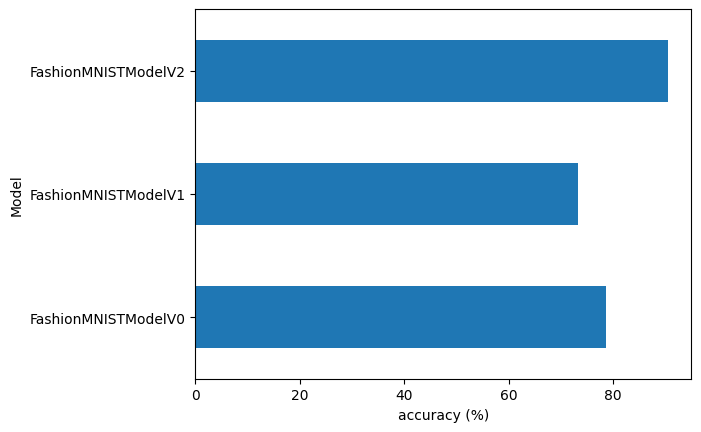

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("Model");

In [ ]:
def make_predicitons(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample (add batch dimesion ans pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediciton probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  # stach the pred probs to turn list intto a ensor
  return torch.stack(pred_probs)



In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

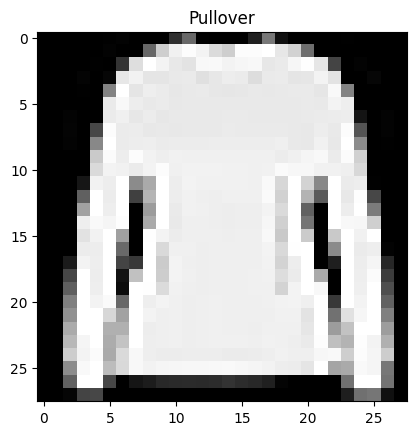

In [ ]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample shape
test_samples[0].shape

plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])


In [ ]:
# make predictions
pred_probs = make_predicitons(model=model_2,
                              data=test_samples)
# View firt two prediction probabilities
pred_probs[:2]

tensor([[4.4445e-03, 3.3542e-08, 9.9438e-01, 8.5427e-07, 1.3059e-05, 9.3389e-08,
         1.1597e-03, 2.4522e-09, 1.0541e-08, 1.2903e-08],
        [8.4936e-07, 2.2109e-08, 1.5177e-08, 1.2047e-06, 3.3384e-08, 5.5583e-06,
         9.0197e-07, 1.8438e-05, 4.6162e-08, 9.9997e-01]])

In [ ]:
test_labels

[2, 9, 5, 1, 4, 8, 5, 7, 8]

In [ ]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 9, 5, 1, 4, 8, 5, 7, 8])

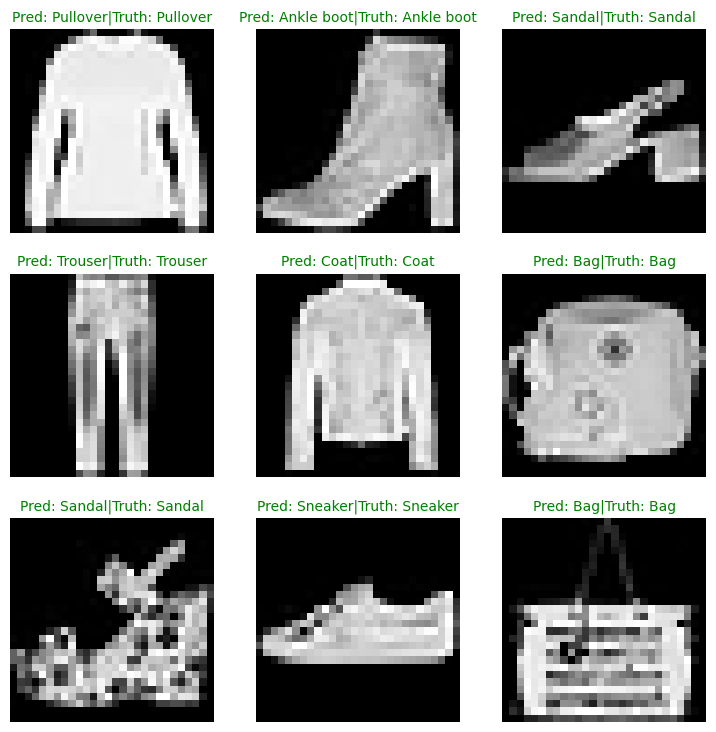

In [ ]:

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #create a subplo t
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Freate a title for the plot
  title_text = f"Pred: {pred_label}|Truth: {truth_label}"

  # check for equality between pred an truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

## Making a cofusion matrix for furhter predicion evaluation


In [ ]:
import mlxtend

from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to targets device
    X, y = X.to(device), y.to(device)
    # Do forward pass
    y_logit = model_2(X)
    # Turn predictions form logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediciton on CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatenate list of predicitons into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [ ]:
len(y_pred)

16

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0
mlxtend version: 0.22.0


In [ ]:
mlxtend.__version__

'0.22.0'

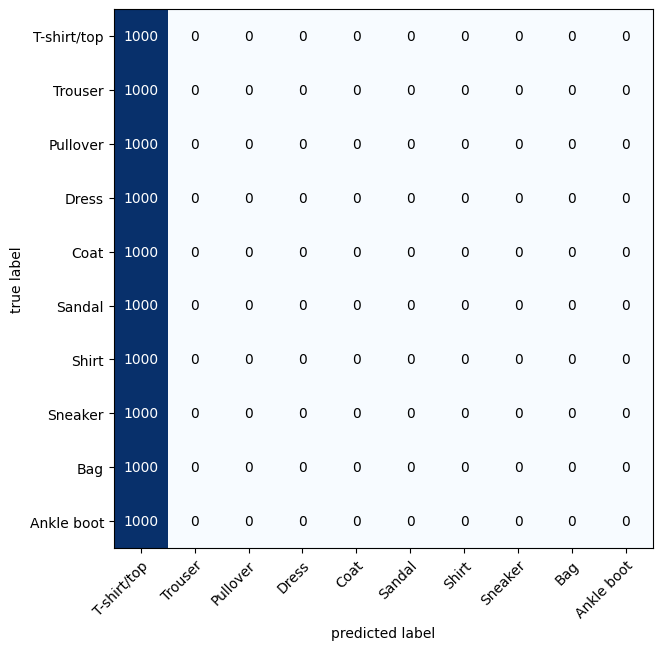

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#3. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",
                          num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot out confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [ ]:
## Save and load our ConvNet model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

saving model to: model/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance

model_2_loaded =FashionMNISTModelV2(input_shape=1,
                                    hidden_units=30,
                                    output_shape=len(class_names))
print(MODEL_SAVE_PATH)
model_2_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


model/03_pytorch_computer_vision_model_2.pth


<All keys matched successfully>

In [ ]:
torch.manual_seed(42)

model_2_loaded_results = eval_model(
    model=model_2_loaded,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(model_2_loaded_results["model_loss"]))